<a href="https://colab.research.google.com/github/sakshiharde/Cognifyz_Internship/blob/main/Level_1_Cognifyz_internship.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Restaurant Data Analysis and Prediction

This project aims to leverage a dataset of 9551 restaurants in particular city to develop a model that predicts a restaurant's success. we will use data on cuisine type,location,rating,table booking, online delivery options to identify key factors influencing the customer choice and restaurant performance.

**Data Preprocessing**: We will address missing value and handle categorical variables by encoding them appropriately. Additionally , we will scale numerical features to ensure their contribution are comparable in the model.

**Methodology**:we will explore the data through visualization and descriptive statistics to understand customer preferences and restaurants trends.

**Evaluation Metrics**: The model's performance will be evaluated using metrics like accuracy . we will also interpret the model's coefficient to understand which factors have the most significant influence on restaurant success.

**Target Audience**: This project is intended to provide valuable insights for restaurant owners and potentially investors in the particular city food scene.

# Level 1
# Task 1 - Data Exploration and Preprocessing

In [ ]:
# importing the libraries
import numpy as np
import pandas as pd
from pandas import Series
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.graph_objects as go

In [ ]:
#Loading  the dataset
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
res_data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Restaurant_data.csv')

In [ ]:
res_data.shape

(9551, 21)

In [ ]:
res_data.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [ ]:
res_data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [ ]:
res_data.tail()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901
9550,5927402,Walter's Coffee Roastery,208,��stanbul,"Cafea��a Mahallesi, Bademalt۱ Sokak, No 21/B, ...",Moda,"Moda, ��stanbul",29.026016,40.984776,Cafe,...,Turkish Lira(TL),No,No,No,No,2,4.0,Green,Very Good,591


In [ ]:
res_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

Checking missing values of each columns of the dataset

In [ ]:
#Missing values/Null values count
res_data.isnull()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9547,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9548,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9549,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
missing_values=res_data.isnull().sum()
print("Missing values/Null values count:",missing_values)


Missing values/Null values count: Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


In [ ]:
#Dropping the missing values present in the dataset
res_data.dropna()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [ ]:
#Let's fill missing values with mean/median(for numerical columns)
res_data_filled_numeric=res_data.fillna(res_data.mean(numeric_only=True))


In [ ]:
#Let's fill missing value with mode(for categorical columns)
res_data__filled_categorical=res_data.fillna(res_data.mode(axis=0))

In [ ]:
#There is a missing values in column cuisines column so let's find the most frequent cuisines
most_frequent_cuisines=res_data['Cuisines'].mode()[0]
#fill the missing values with the most frequent cuisines
res_data['Cuisines'].fillna(most_frequent_cuisines,inplace=True)



In [ ]:
#checking class distribution
class_distribution=res_data['Aggregate rating'].value_counts()
print("class distribution:")
print(class_distribution)

class distribution:
Aggregate rating
0.0    2148
3.2     522
3.1     519
3.4     498
3.3     483
3.5     480
3.0     468
3.6     458
3.7     427
3.8     400
2.9     381
3.9     335
2.8     315
4.1     274
4.0     266
2.7     250
4.2     221
2.6     191
4.3     174
4.4     144
2.5     110
4.5      95
2.4      87
4.6      78
4.9      61
2.3      47
4.7      42
2.2      27
4.8      25
2.1      15
2.0       7
1.9       2
1.8       1
Name: count, dtype: int64


# Task 2- Descriptive Analysis

In [ ]:
#Let's check some statistical measure like mean,median and mode for column Country code
c_code=res_data['Country Code']

mean_value=c_code.mean()
print("Mean:",mean_value)

median_value=c_code.median()
print("Median:",median_value)

mode_value=c_code.mode()
print("Mode:",mode_value)

Mean: 18.365616165846507
Median: 1.0
Mode: 0    1
Name: Country Code, dtype: int64


In [ ]:
#Here we are checking for column Average cost of two
avg_cost=res_data['Average Cost for two']

mean_value=avg_cost.mean()
print("Mean:",mean_value)

median_value=avg_cost.median()
print("Median:",median_value)

mode_value=avg_cost.mode()
print("Mode:",mode_value)

std_value=avg_cost.std()
print("Standard Deviation:",std_value)


Mean: 1199.2107632708617
Median: 400.0
Mode: 0    500
Name: Average Cost for two, dtype: int64
Standard Deviation: 16121.183073499644


In [ ]:
price_range=res_data['Price range']

mean_value=price_range.mean()
print("Mean:",mean_value)

median_value=price_range.median()
print("Median:",median_value)

mode_value=price_range.mode()
print("Mode:",mode_value)

std_value=price_range.std()
print("Standard Deviation:",std_value)

Mean: 1.804837189823055
Median: 2.0
Mode: 0    1
Name: Price range, dtype: int64
Standard Deviation: 0.905608847397614


In [ ]:
agg_rating=res_data['Aggregate rating']

mean_value=agg_rating.mean()
print("Mean:",mean_value)

median_value=agg_rating.median()
print("Median",median_value)

mode_value=agg_rating.mode()
print("Mode:",mode_value)

Mean: 2.66637001361114
Median 3.2
Mode: 0    0.0
Name: Aggregate rating, dtype: float64


In [ ]:
votes=res_data['Votes']

mean_value=votes.mean()
print("Mean:",mean_value)

median_value=votes.median()
print("Median:",median_value)

mode_value=votes.mode()
print("Mode:",mode_value)

std_value=votes.std()
print("Standard Deviation:",std_value)

Mean: 156.909747670401
Median: 31.0
Mode: 0    0
Name: Votes, dtype: int64
Standard Deviation: 430.1691453762912


In [ ]:
#Let's see the distribution of categorical variables
country_counts=res_data['Country Code'].value_counts()
print("Country Distribution :\n",country_counts)


Country Distribution :
 Country Code
1      8652
216     434
215      80
30       60
214      60
189      60
148      40
208      34
14       24
162      22
94       21
184      20
166      20
191      20
37        4
Name: count, dtype: int64


In [ ]:
# Delivery vs. Booking crosstab
delivery_booking_crosstab=pd.crosstab(res_data['Has Table booking'],res_data['Has Online delivery'])
print("Delivery vs. Booking crosstab:\n",delivery_booking_crosstab)

Delivery vs. Booking crosstab:
 Has Online delivery    No   Yes
Has Table booking              
No                   6377  2016
Yes                   723   435


In [ ]:
#Explore Cuisines (assuming a separate function to split comma-separated cuisines)
def split_cuisines(cuisines_str):
    return [cuisine.strip() for cuisine in cuisines_str.split(',')]

res_data['Cuisines'] = res_data['Cuisines'].apply(split_cuisines)
cuisines_counts = res_data['Cuisines'].explode().value_counts()
top_cuisines = cuisines_counts.head(10)
print("Top 10 Cuisines:",cuisines_counts.head(10))

Top 10 Cuisines: Cuisines
North Indian    3969
Chinese         2735
Fast Food       1986
Mughlai          995
Italian          764
Bakery           745
Continental      736
Cafe             703
Desserts         653
South Indian     636
Name: count, dtype: int64


Identifying the top cuisins of the restaurant and cities with the highest number of restaurant

In [ ]:
cuisines='Cuisines'
value_counts=res_data[cuisines].value_counts()
top_cuisines=value_counts.head(10)
print("Top 10 cuisines with Highest Number of Restaurants:",cuisines,":")
print(top_cuisines)

Top 10 cuisines with Highest Number of Restaurants: Cuisines :
Cuisines
North Indian    3001
Chinese          855
Fast Food        672
Bakery           621
Cafe             617
American         278
South Indian     262
Mithai           246
Street Food      236
Continental      235
Name: count, dtype: int64


In [ ]:
city_counts=res_data['City'].value_counts()
top_cities=city_counts.head(10)
print("Top 10 Cities with the Highest Number of Restaurants:")
print(top_cities)

Top  Cities with the Highest Number of Restaurants:
City
New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Bhubaneshwar      21
Amritsar          21
Ahmedabad         21
Lucknow           21
Guwahati          21
Name: count, dtype: int64


# Task 3- Geospatial Analysis

In [ ]:

#190 Uptown vietnam cuisine restaurant showing on the map
c_latitude=32.470315
c_longitude=-84.992671
city_name="Columbus-Uptown vietnam cuisine"

trace=go.Scattermapbox(
    lat=[c_latitude],
    lon=[c_longitude],
    mode='markers',
    marker=dict(size=14,color='red'),
    text=[city_name],

)
layout=go.Layout(
    autosize=True,
    hovermode='closest',
    mapbox=dict(
        center=dict(lat=c_latitude,lon=c_longitude),
        zoom=10,
        style='open-street-map'
    ),
)

fig=go.Figure(data=[trace],layout=layout)
fig.show()

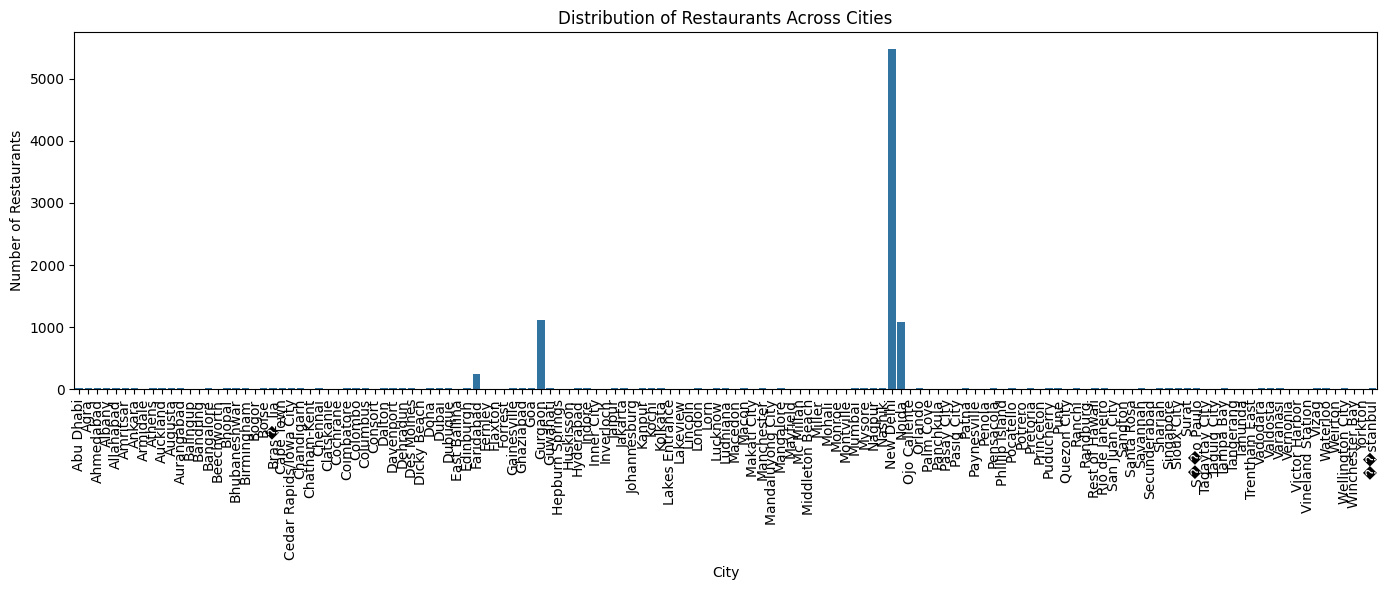

In [ ]:
#Grouping data by city or country and count the number of restaurant
restaurant_count=res_data.groupby('City')['Restaurant ID'].count().reset_index()

#ploting the distribution
plt.figure(figsize=(14,6))
sns.barplot(x='City',y='Restaurant ID',data=restaurant_count)
plt.title('Distribution of Restaurants Across Cities')
plt.xlabel('City')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

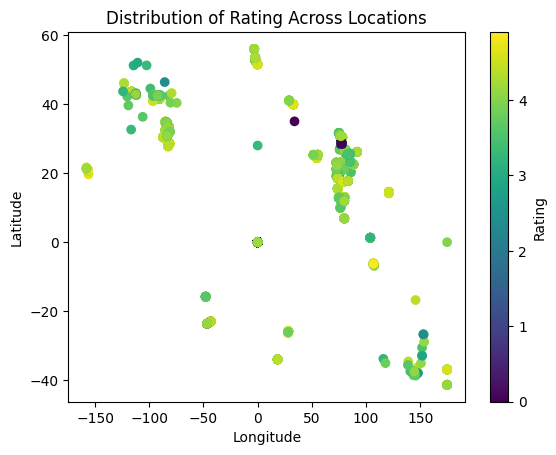

Correlation between latitude and longitude: 0.0432072857493028


In [ ]:
#Let's determine the correlation between a restaurant's location and it's rating
if all(col in res_data.columns for col in ['Latitude','Longitude']):
    res_data['Latitude']=res_data['Latitude'].astype(float)
    res_data['Longitude']=res_data['Longitude'].astype(float)
    #Creating a scatter plot to visualize the distribution of rating across locations
    plt.scatter(res_data['Longitude'],res_data['Latitude'],c=res_data['Aggregate rating'],cmap='viridis')
    plt.colorbar(label='Rating')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('Distribution of Rating Across Locations')
    plt.show()
    #Calculating the correlation between latitude and longitude
    correlation=res_data['Latitude'].corr(res_data['Longitude'])
    print("Correlation between latitude and longitude:",correlation)
else:
    print("Latitude and Longitude columns not found in the DataFrame.")